In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret

In [2]:
data = pd.read_csv('03_Wheat_Seeds.csv')
data.head()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Exploratory Data Analysis

In [3]:
data.shape #VERY little rows

(199, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            199 non-null    float64
 1   Perimeter       199 non-null    float64
 2   Compactness     199 non-null    float64
 3   Length          199 non-null    float64
 4   Width           199 non-null    float64
 5   AsymmetryCoeff  199 non-null    float64
 6   Groove          199 non-null    float64
 7   Type            199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [7]:
print(f"Dataset shape: {data.shape}")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
print(f"\nColumn names: {list(data.columns)}")

Dataset shape: (199, 8)
Number of samples: 199
Number of features: 8

Column names: ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'AsymmetryCoeff', 'Groove', 'Type']


In [8]:
#Basic Dataset information
print("Data types and missing values:")
info_df = pd.DataFrame({
    'Data Type': data.dtypes,
    'Non-Null Count': data.count(),
    'Missing Values': data.isnull().sum(),
    'Missing %': (data.isnull().sum() / len(data) * 100).round(2)
})
print(info_df)

Data types and missing values:
               Data Type  Non-Null Count  Missing Values  Missing %
Area             float64             199               0        0.0
Perimeter        float64             199               0        0.0
Compactness      float64             199               0        0.0
Length           float64             199               0        0.0
Width            float64             199               0        0.0
AsymmetryCoeff   float64             199               0        0.0
Groove           float64             199               0        0.0
Type               int64             199               0        0.0


In [9]:
#Class Distribution
type_counts = data['Type'].value_counts().sort_index()
type_percentages = data['Type'].value_counts(normalize=True).sort_index() * 100
print("Wheat type distribution:")
for type_val in sorted(data['Type'].unique()):
    count = type_counts[type_val]
    percentage = type_percentages[type_val]
    print(f"Type {type_val}: {count} samples ({percentage:.1f}%)")

Wheat type distribution:
Type 1: 66 samples (33.2%)
Type 2: 68 samples (34.2%)
Type 3: 65 samples (32.7%)


In [10]:
#Analysis for numerical Features
numerical_cols = data.select_dtypes(include=[np.number]).columns.drop('Type')
    
# Basic statistics
print("Basic Statistics for Numerical Features:")
stats_df = data[numerical_cols].describe()
print(stats_df.round(3))
    
# Additional statistics
print(f"\nAdditional Statistics:")
additional_stats = pd.DataFrame({
    'Skewness': data[numerical_cols].skew(),
     'Kurtosis': data[numerical_cols].kurtosis(),
     'Variance': data[numerical_cols].var()
})
print(additional_stats.round(3))

Basic Statistics for Numerical Features:
          Area  Perimeter  Compactness   Length    Width  AsymmetryCoeff  \
count  199.000    199.000      199.000  199.000  199.000         199.000   
mean    14.919     14.596        0.871    5.643    3.266           3.699   
std      2.920      1.310        0.023    0.444    0.378           1.471   
min     10.590     12.410        0.808    4.899    2.630           0.765   
25%     12.330     13.470        0.857    5.267    2.954           2.570   
50%     14.430     14.370        0.873    5.541    3.245           3.631   
75%     17.455     15.805        0.887    6.002    3.564           4.799   
max     21.180     17.250        0.918    6.675    4.033           8.315   

        Groove  
count  199.000  
mean     5.421  
std      0.493  
min      4.519  
25%      5.046  
50%      5.228  
75%      5.879  
max      6.550  

Additional Statistics:
                Skewness  Kurtosis  Variance
Area               0.373    -1.115     8.526
Perimet

In [11]:
corr_matrix = data[numerical_cols].corr()
    
# Find highly correlated pairs
print("Highly correlated feature pairs (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_val))
            print(f"{feature1} - {feature2}: {corr_val:.3f}")
    
    # Sort by absolute correlation
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"\nTop 5 strongest correlations:")
for i, (f1, f2, corr) in enumerate(high_corr_pairs[:5]):
    print(f"{i+1}. {f1} - {f2}: {corr:.3f}")

Highly correlated feature pairs (|r| > 0.7):
Area - Perimeter: 0.994
Area - Length: 0.951
Area - Width: 0.971
Area - Groove: 0.863
Perimeter - Length: 0.973
Perimeter - Width: 0.945
Perimeter - Groove: 0.890
Compactness - Width: 0.762
Length - Width: 0.863
Length - Groove: 0.932
Width - Groove: 0.748

Top 5 strongest correlations:
1. Area - Perimeter: 0.994
2. Perimeter - Length: 0.973
3. Area - Width: 0.971
4. Area - Length: 0.951
5. Perimeter - Width: 0.945


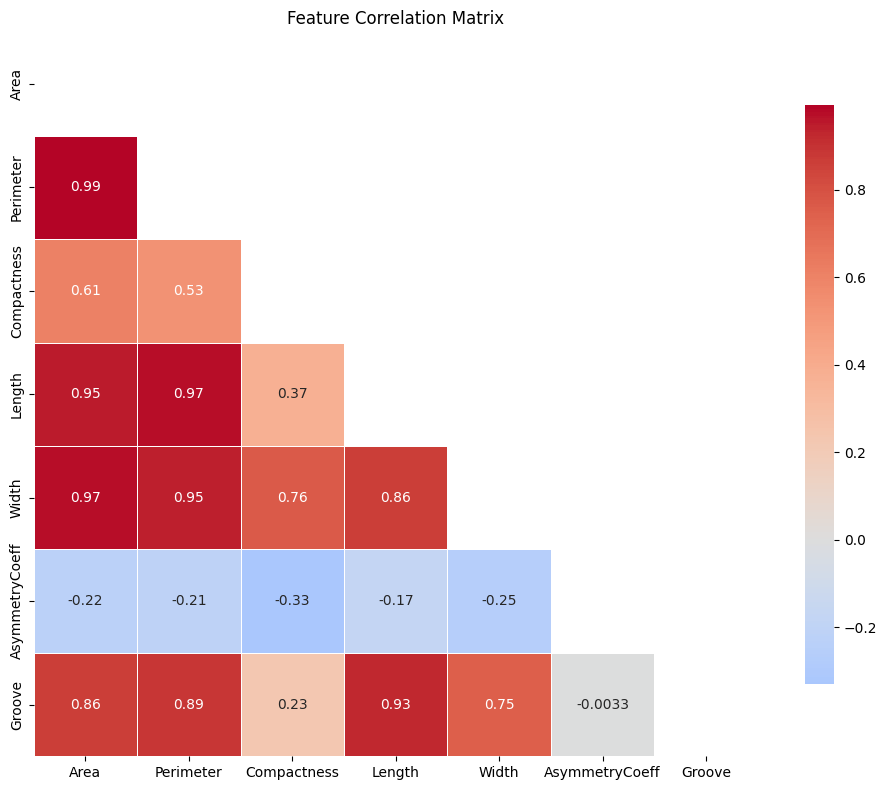

In [12]:
# Calculate correlation matrix
corr_matrix = data[numerical_cols].corr()

# Create the plot
plt.figure(figsize=(10, 8))

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8})

plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [13]:
grouped_stats = data.groupby('Type')[numerical_cols].agg(['mean', 'std', 'min', 'max'])
    
print("Feature statistics by wheat type:")
for col in numerical_cols:
    print(f"\n{col}:")
    for wheat_type in sorted(data['Type'].unique()):
        mean_val = grouped_stats.loc[wheat_type, (col, 'mean')]
        std_val = grouped_stats.loc[wheat_type, (col, 'std')]
        min_val = grouped_stats.loc[wheat_type, (col, 'min')]
        max_val = grouped_stats.loc[wheat_type, (col, 'max')]
        print(f"  Type {wheat_type}: Mean: {mean_val:.3f}, STD: {std_val:.3f}, Range: {min_val:.3f} - {max_val:.3f}")

Feature statistics by wheat type:

Area:
  Type 1: Mean: 14.354, STD: 1.178, Range: 11.230 - 17.080
  Type 2: Mean: 18.370, STD: 1.414, Range: 15.380 - 21.180
  Type 3: Mean: 11.881, STD: 0.721, Range: 10.590 - 13.370

Perimeter:
  Type 1: Mean: 14.307, STD: 0.559, Range: 12.630 - 15.460
  Type 2: Mean: 16.157, STD: 0.599, Range: 14.890 - 17.250
  Type 3: Mean: 13.256, STD: 0.348, Range: 12.410 - 13.950

Compactness:
  Type 1: Mean: 0.880, STD: 0.016, Range: 0.839 - 0.918
  Type 2: Mean: 0.883, STD: 0.015, Range: 0.845 - 0.911
  Type 3: Mean: 0.849, STD: 0.021, Range: 0.808 - 0.896

Length:
  Type 1: Mean: 5.513, STD: 0.229, Range: 4.902 - 6.053
  Type 2: Mean: 6.158, STD: 0.259, Range: 5.363 - 6.675
  Type 3: Mean: 5.237, STD: 0.137, Range: 4.899 - 5.541

Width:
  Type 1: Mean: 3.247, STD: 0.173, Range: 2.879 - 3.683
  Type 2: Mean: 3.679, STD: 0.186, Range: 3.231 - 4.033
  Type 3: Mean: 2.852, STD: 0.143, Range: 2.630 - 3.232

AsymmetryCoeff:
  Type 1: Mean: 2.691, STD: 1.199, Range:

## Visuals to aid with understanding

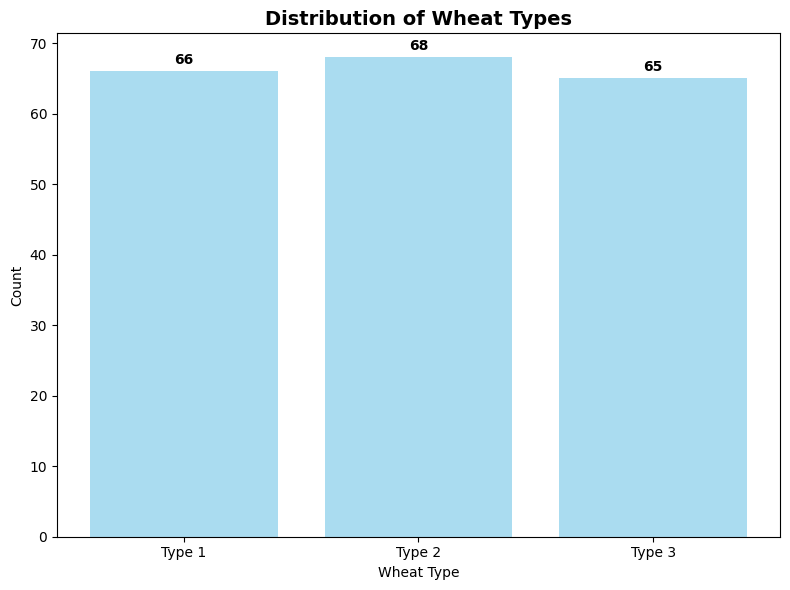

In [14]:
# Get numerical columns (excluding Type)
numerical_cols = data.select_dtypes(include=[np.number]).columns.drop('Type')

# Calculate correlation matrix
corr_matrix = data[numerical_cols].corr()

# 1. TARGET VARIABLE DISTRIBUTION (Type Distribution)
plt.figure(figsize=(8, 6))

type_counts = data['Type'].value_counts().sort_index()
plt.bar(range(len(type_counts)), type_counts.values, color='skyblue', alpha=0.7)
plt.title('Distribution of Wheat Types', fontsize=14, fontweight='bold')
plt.xlabel('Wheat Type')
plt.ylabel('Count')
plt.xticks(range(len(type_counts)), [f'Type {i}' for i in type_counts.index])

# Add count labels on bars
for i, count in enumerate(type_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

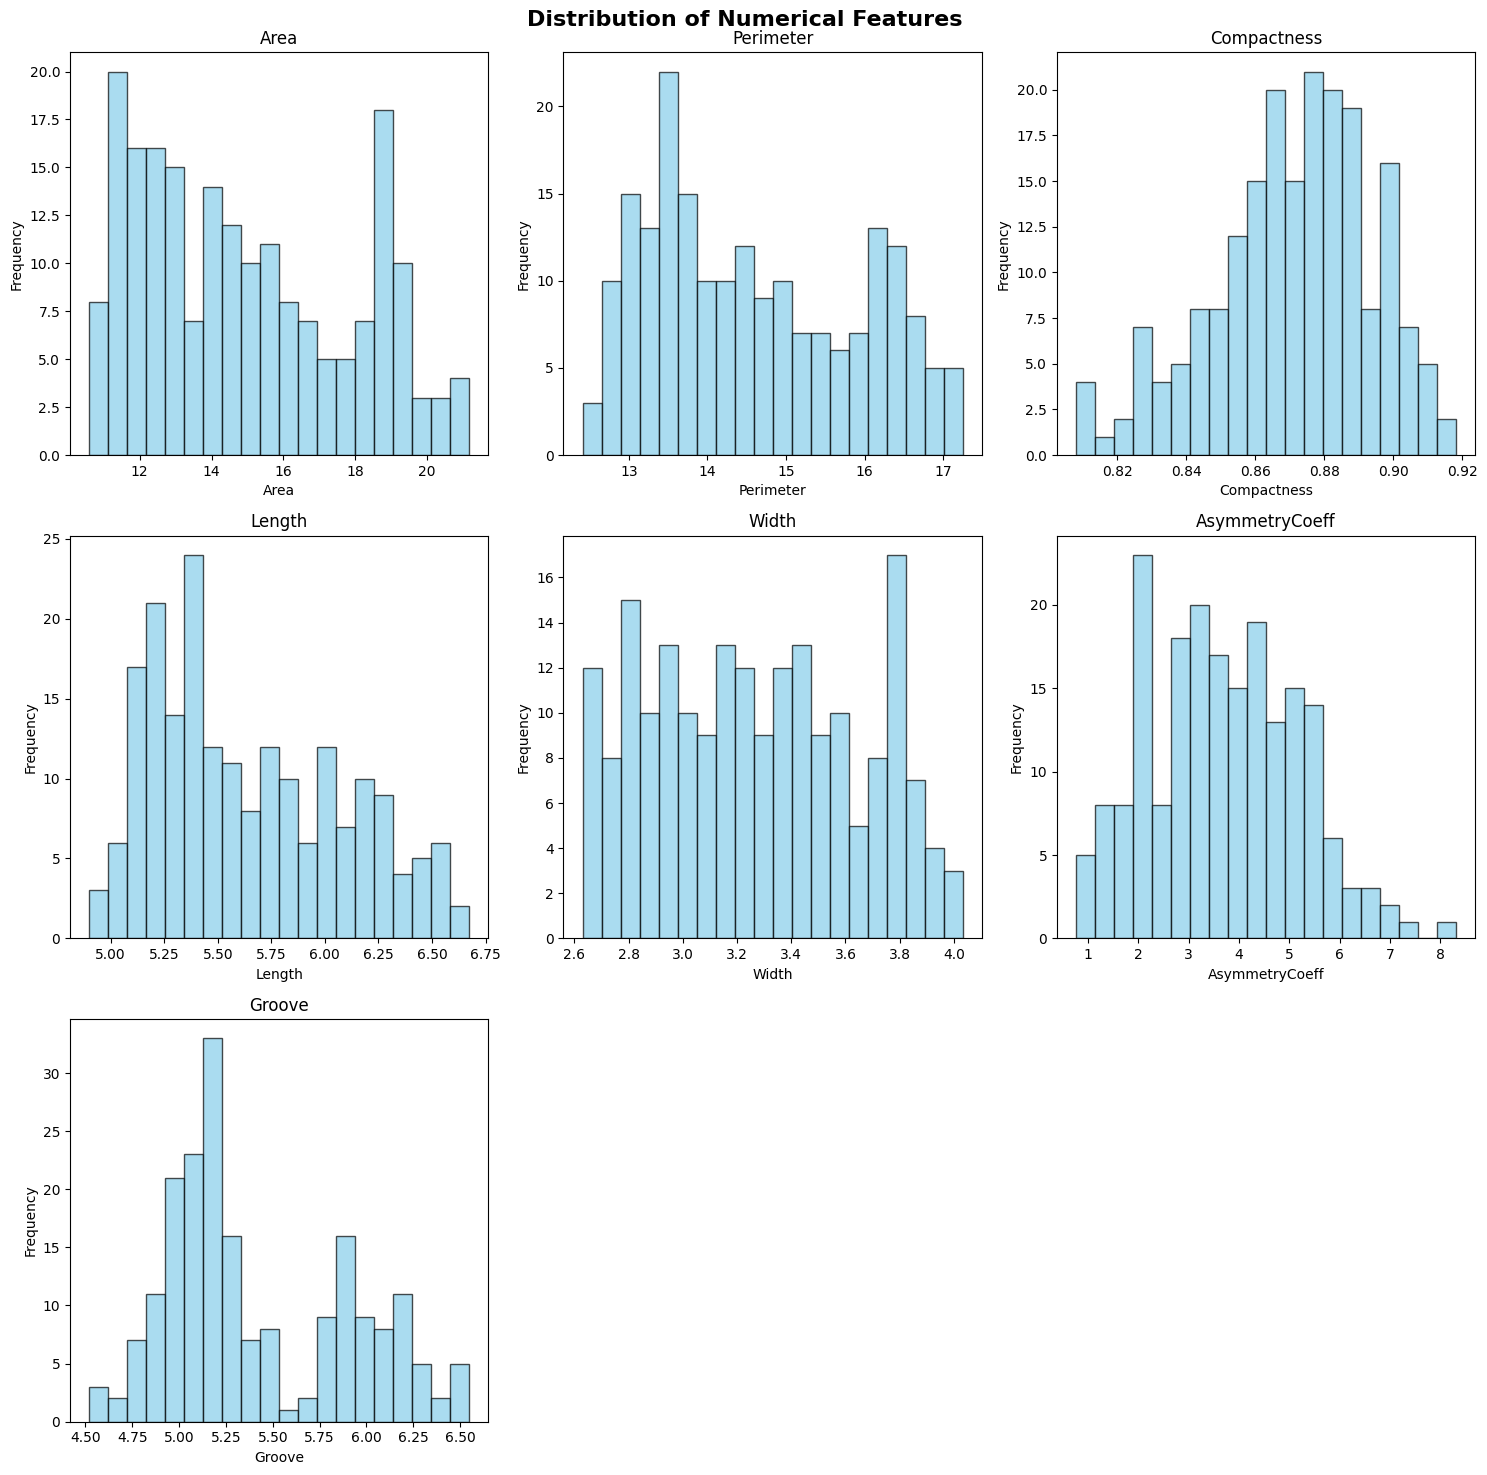

In [15]:
# Feature Distributions
n_features = len(numerical_cols)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

# Flatten axes for easy indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(data[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

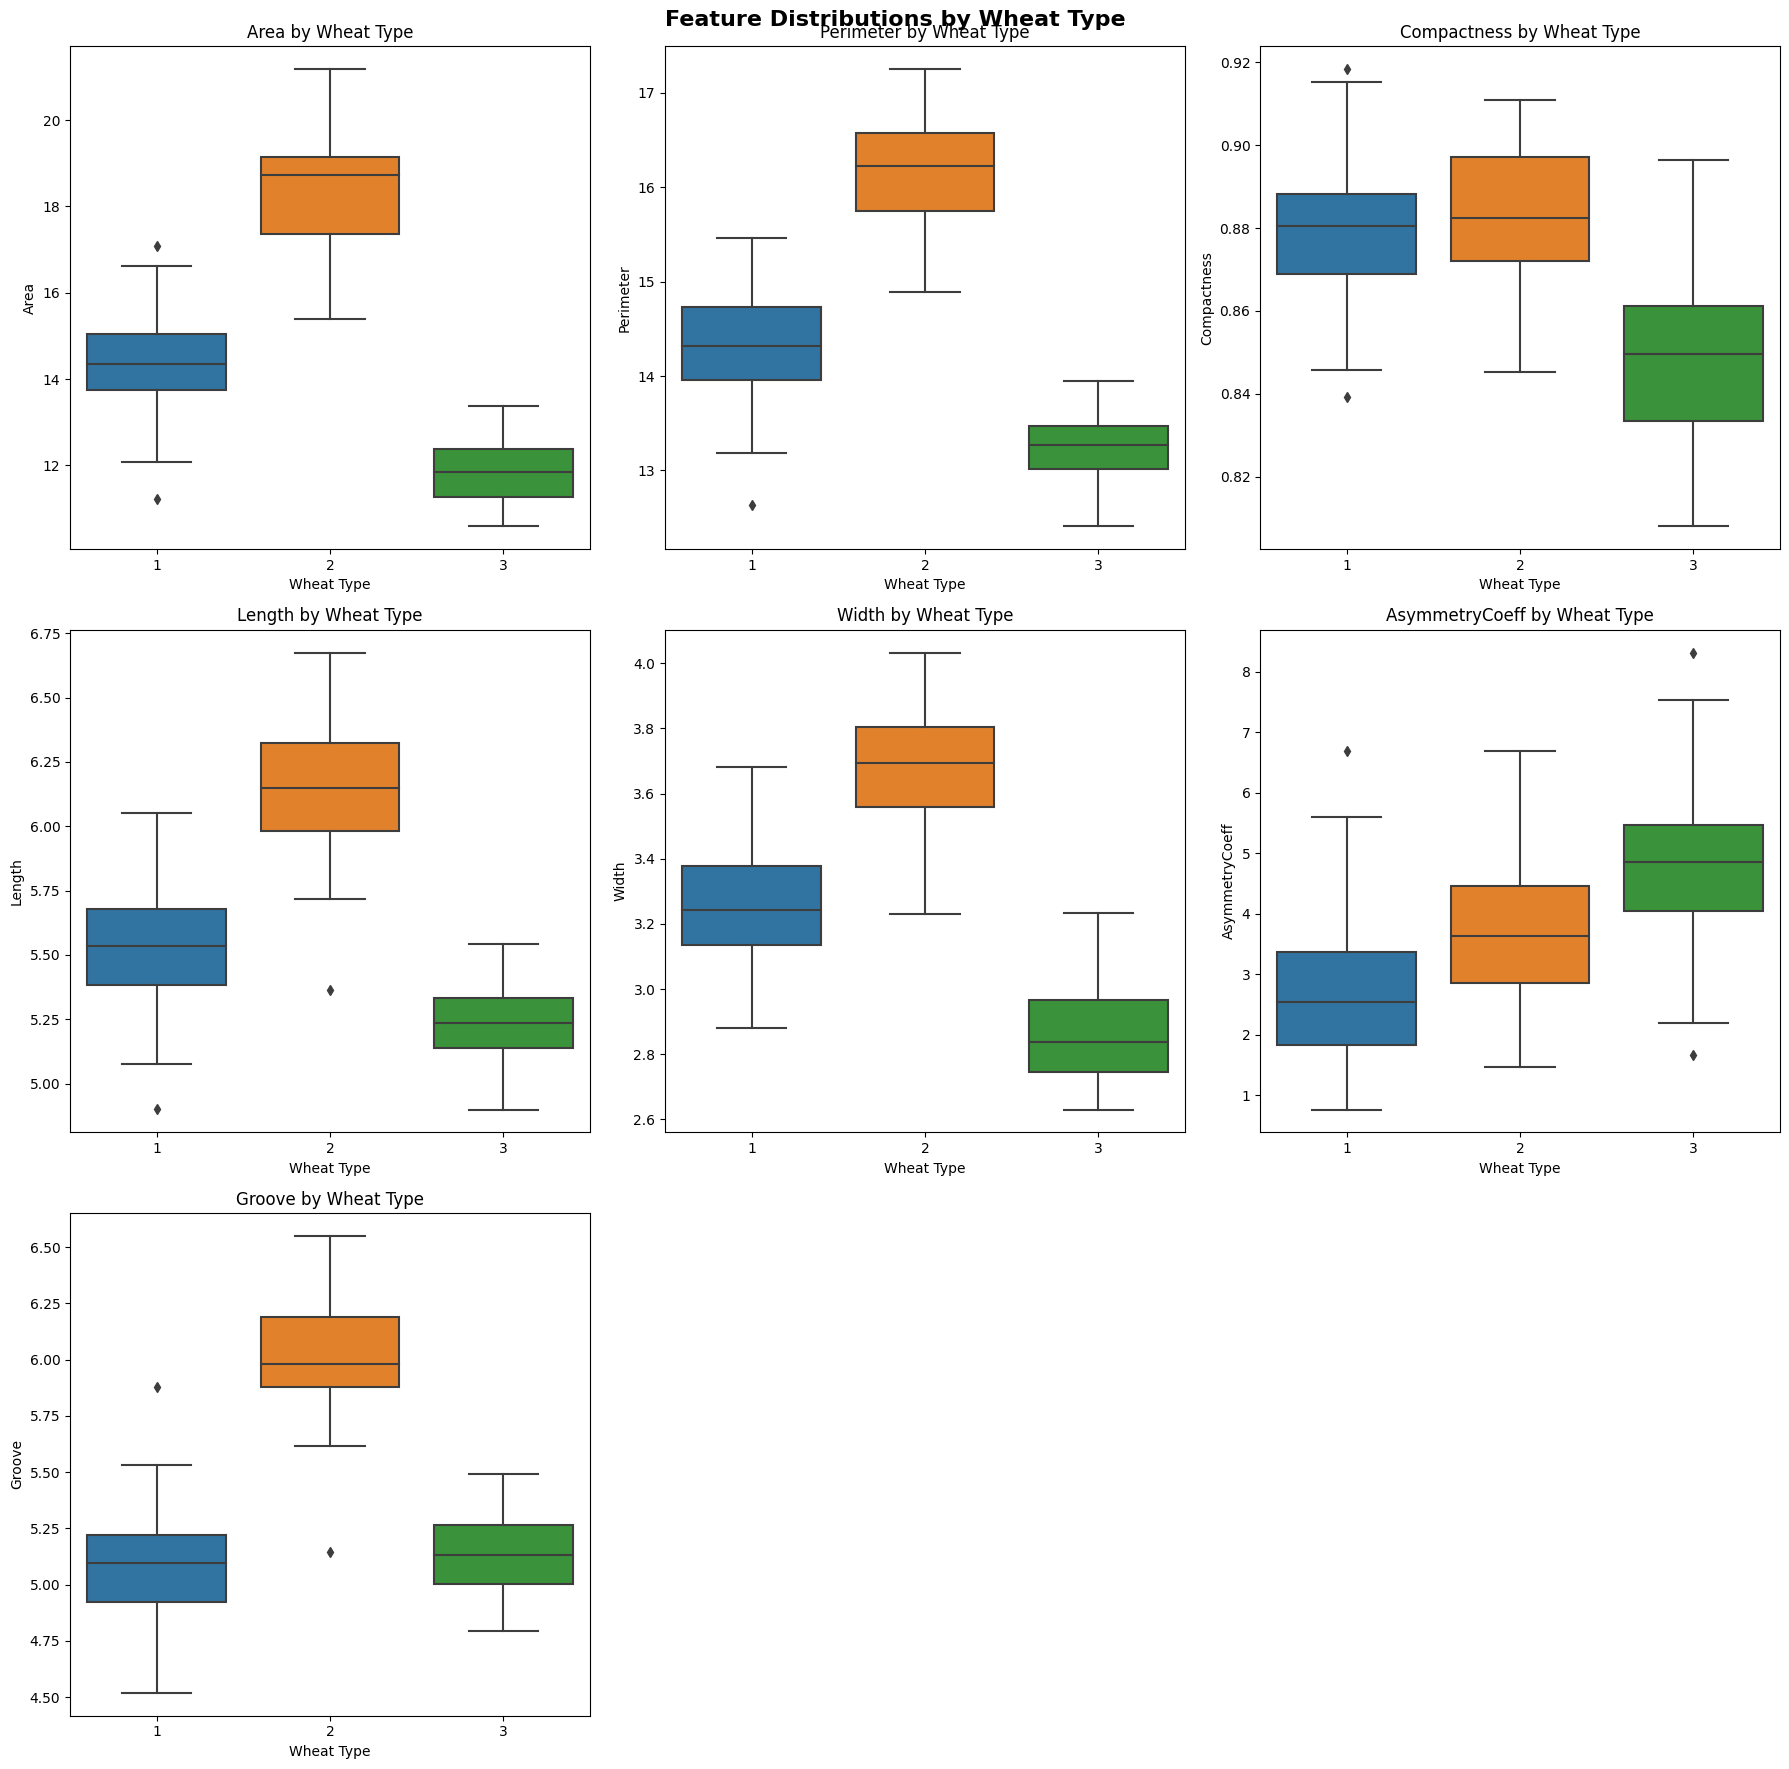

In [16]:
#Box plots by type
n_cols_box = 3
n_rows_box = (len(numerical_cols) + n_cols_box - 1) // n_cols_box

fig, axes = plt.subplots(n_rows_box, n_cols_box, figsize=(18, 6*n_rows_box))
fig.suptitle('Feature Distributions by Wheat Type', fontsize=16, fontweight='bold')

# Flatten axes for easy indexing
if n_rows_box == 1:
    axes = [axes] if n_cols_box == 1 else axes
else:
    axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=data, x='Type', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Wheat Type')
    axes[i].set_xlabel('Wheat Type')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [17]:
outlier_summary = {}

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(data)) * 100
    
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"{col}:")
    print(f"  Outliers: {outlier_count} ({outlier_percentage:.1f}%)")
    print(f"  Bounds: [{lower_bound:.3f}, {upper_bound:.3f}]")

Area:
  Outliers: 0 (0.0%)
  Bounds: [4.643, 25.142]
Perimeter:
  Outliers: 0 (0.0%)
  Bounds: [9.968, 19.307]
Compactness:
  Outliers: 4 (2.0%)
  Bounds: [0.813, 0.931]
Length:
  Outliers: 0 (0.0%)
  Bounds: [4.165, 7.105]
Width:
  Outliers: 0 (0.0%)
  Bounds: [2.040, 4.479]
AsymmetryCoeff:
  Outliers: 1 (0.5%)
  Bounds: [-0.773, 8.142]
Groove:
  Outliers: 0 (0.0%)
  Bounds: [3.797, 7.128]


### Summary 
-  Outliers are small (2.5%), so removing them isn't necessary.
-  Very low sample size, cross-validation is needed
-  Highly Correlated features, can either drop featuers that aren't as useful or choose a tree-based model.
-  No missing values, no duplicates, and balanced distribution of the classes, so nothing to be done for that
### Cleaning to be done
- Feature scaling can be done for non-tree models

In [19]:
from pycaret.classification import *

In [28]:
original = setup(
    data=data,
    target='Type',
    session_id=123,
    remove_multicollinearity=True, # drop highly correlated features
    multicollinearity_threshold=0.95, # drop features >95% correlated
    feature_selection=True,      # optional: keep most useful features
    fold=5,                     # 10-fold cross-validation (small dataset)
    log_experiment=False,         # enable MLflow logging
    experiment_name="wheat_classification"
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 4
[LightGBM] [Info] Start training from score -1.105833
[LightGBM] [Info] Start training from score -1.063273
[LightGBM] [Info] Start training from score -1.127811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(199, 2)"
6,Transformed train set shape,"(139, 2)"
7,Transformed test set shape,"(60, 2)"
8,Numeric features,7
9,Preprocess,True


In [26]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7484,0.8717,0.7484,0.7488,0.7408,0.6217,0.6289,0.1600
knn,K Neighbors Classifier,0.7341,0.8593,0.7341,0.7318,0.7284,0.6003,0.6044,0.0960
nb,Naive Bayes,0.7267,0.8670,0.7267,0.7406,0.7122,0.5905,0.6096,0.1040
qda,Quadratic Discriminant Analysis,0.7267,0.0000,0.7267,0.7406,0.7122,0.5905,0.6096,0.0720
ada,Ada Boost Classifier,0.7198,0.0000,0.7198,0.7241,0.6711,0.5804,0.6348,0.1300
rf,Random Forest Classifier,0.7053,0.8381,0.7053,0.7070,0.7021,0.5573,0.5613,0.1140
et,Extra Trees Classifier,0.7053,0.8136,0.7053,0.7070,0.7021,0.5573,0.5613,0.1740
gbc,Gradient Boosting Classifier,0.6910,0.0000,0.6910,0.6924,0.6877,0.5358,0.5397,0.1200
lr,Logistic Regression,0.6841,0.0000,0.6841,0.6251,0.6367,0.5257,0.5618,0.0700
dt,Decision Tree Classifier,0.6839,0.7781,0.6839,0.6802,0.6751,0.5243,0.5321,0.0780


In [27]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
norm = setup(
    data=data,
    target='Type',
    session_id=123,
    normalize=True,              # scale features (important for SVM, kNN, etc.)
    remove_multicollinearity=True, # drop highly correlated features
    multicollinearity_threshold=0.95, # drop features >95% correlated
    feature_selection=True,      # optional: keep most useful features
    fold=5,                     # 10-fold cross-validation (small dataset)
    log_experiment=False,         # enable MLflow logging
    experiment_name="wheat_classification"
)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(199, 2)"
6,Transformed train set shape,"(139, 2)"
7,Transformed test set shape,"(60, 2)"
8,Numeric features,7
9,Preprocess,True


In [30]:
best_norm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7481,0.8815,0.7481,0.7386,0.7300,0.6240,0.6376,0.0780
qda,Quadratic Discriminant Analysis,0.7410,0.0000,0.7410,0.7364,0.7239,0.6131,0.6244,0.0740
lightgbm,Light Gradient Boosting Machine,0.7130,0.8654,0.7130,0.7387,0.7121,0.5679,0.5767,0.1900
lr,Logistic Regression,0.7127,0.0000,0.7127,0.7013,0.6925,0.5707,0.5889,0.0620
lda,Linear Discriminant Analysis,0.7124,0.0000,0.7124,0.7056,0.6957,0.5704,0.5841,0.1260
dt,Decision Tree Classifier,0.6910,0.7682,0.6910,0.6985,0.6903,0.5363,0.5400,0.1000
et,Extra Trees Classifier,0.6910,0.7865,0.6910,0.6985,0.6903,0.5363,0.5400,0.1660
knn,K Neighbors Classifier,0.6841,0.8539,0.6841,0.7052,0.6809,0.5241,0.5321,0.0920
rf,Random Forest Classifier,0.6839,0.8482,0.6839,0.6907,0.6824,0.5256,0.5297,0.1580
gbc,Gradient Boosting Classifier,0.6839,0.0000,0.6839,0.6907,0.6824,0.5256,0.5297,0.2080


In [31]:
evaluate_model(best_norm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Test

In [47]:
norm = setup(
    data=data,
    target='Type',
    session_id=123,
    normalize=True,              # scale features (important for SVM, kNN, etc.)
    ignore_features=['Length','Width'],
    fold=5,
    log_experiment=False,         # enable MLflow logging
    experiment_name="wheat_classification"
)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(199, 6)"
6,Transformed train set shape,"(139, 6)"
7,Transformed test set shape,"(60, 6)"
8,Ignore features,2
9,Numeric features,5


In [48]:
best_test = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9643,0.0000,0.9643,0.9688,0.9629,0.9462,0.9493,0.0100
svm,SVM - Linear Kernel,0.9492,0.0000,0.9492,0.9528,0.9474,0.9236,0.9267,0.0140
ridge,Ridge Classifier,0.9492,0.0000,0.9492,0.9530,0.9475,0.9237,0.9267,0.0080
rf,Random Forest Classifier,0.9426,0.9966,0.9426,0.9527,0.9400,0.9137,0.9199,0.0500
nb,Naive Bayes,0.9357,0.9962,0.9357,0.9453,0.9336,0.9034,0.9088,0.0120
qda,Quadratic Discriminant Analysis,0.9357,0.0000,0.9357,0.9465,0.9336,0.9033,0.9095,0.0100
et,Extra Trees Classifier,0.9357,0.9977,0.9357,0.9471,0.9338,0.9034,0.9098,0.0420
gbc,Gradient Boosting Classifier,0.9354,0.0000,0.9354,0.9474,0.9327,0.9030,0.9102,0.0640
catboost,CatBoost Classifier,0.9354,0.9966,0.9354,0.9483,0.9335,0.9030,0.9102,0.4440
lr,Logistic Regression,0.9278,0.0000,0.9278,0.9343,0.9249,0.8915,0.8963,0.0180


In [49]:
evaluate_model(best_test)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

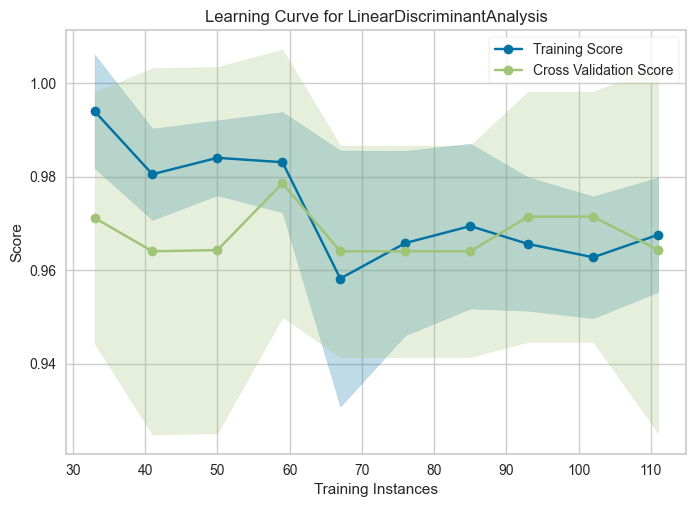

In [50]:
plot_model(best_test, plot='learning')

In [52]:
tuned = tune_model(best_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9643,0.0000,0.9643,0.9679,0.9642,0.9464,0.9482
2,0.9643,0.0000,0.9643,0.9679,0.9642,0.9464,0.9482
3,0.8929,0.0000,0.8929,0.9083,0.8863,0.8385,0.8500
4,0.9630,0.0000,0.9630,0.9667,0.9628,0.9444,0.9464
Mean,0.9569,0.0000,0.9569,0.9621,0.9555,0.9351,0.9386
Std,0.0349,0.0000,0.0349,0.0297,0.0373,0.0527,0.0487


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [53]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
save_model(tuned, 'wheat_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'Perimeter', 'Compactness',
                                              'AsymmetryCoeff', 'Groove'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_emp...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('normalize',
    

In [55]:
import streamlit as st
import pandas as pd
from pycaret.classification import load_model, predict_model

# Load the exported PyCaret model
model = load_model('wheat_classifier')

# App title
st.title("Wheat Type Classification")

# Input fields for features used in training
area = st.number_input("Area", min_value=0.0)
perimeter = st.number_input("Perimeter", min_value=0.0)
compactness = st.number_input("Compactness", min_value=0.0)
asymmetry_coeff = st.number_input("Asymmetry Coefficient", min_value=0.0)
groove = st.number_input("Groove", min_value=0.0)

# Predict button
if st.button("Predict"):
    # Prepare input dataframe
    input_data = pd.DataFrame({
        'Area': [area],
        'Perimeter': [perimeter],
        'Compactness': [compactness],
        'AsymmetryCoeff': [asymmetry_coeff],
        'Groove': [groove]
    })

    # Make prediction
    prediction = predict_model(model, data=input_data)

    # Show prediction
    st.success(f"Predicted Wheat Type: {prediction['Label'][0]}")

ModuleNotFoundError: No module named 'streamlit'